<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Cristina Vazquez, Gerardo Ruiz Velasco Lazalde.

**Fecha:** 20 de febrero del 2021.

**Expediente** : 721215 ,715878 .
**Profesor:** Oscar David Jaramillo Zuluaga.

**Link repositorio: https://github.com/GerardoRVL97/TAREA_9_RUIZ_G_VAZQUEZ_C **

# Tarea 9: Clase:22

# <font color = 'red'> Tarea: </font>

Replicar el procedimiento anterior para valoración de opciones 'call', pero en este caso para opciones tipo 'put' y compararlo con el valor teórico de la ecuación de Black-Scholes

### Respuesta Gerardo Ruiz Velasco Lazalde PUT- "V"

In [2]:
#Solución Gerardo
#importar los paquetes que se van a usar
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
%matplotlib inline
#algunas opciones para Pandas
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

In [3]:
aapl = web.YahooOptions('V')
aapl_opt = aapl.get_all_data().reset_index()
aapl_opt.set_index('Expiry')
# aapl

,Strike,Type,Symbol,...,Quote_Time,Last_Trade_Date,JSON
Expiry,,,,,,,
2021-06-18,70.0,call,V210618C00070000,...,2021-04-28 23:59:32,2021-01-25 18:56:42,"{'contractSymbol': 'V210618C00070000', 'strike..."
2021-06-18,70.0,put,V210618P00070000,...,2021-04-28 23:59:32,2021-04-12 14:09:41,"{'contractSymbol': 'V210618P00070000', 'strike..."
2021-09-17,70.0,call,V210917C00070000,...,2021-04-28 23:59:32,2020-11-18 18:48:02,"{'contractSymbol': 'V210917C00070000', 'strike..."
2021-09-17,70.0,put,V210917P00070000,...,2021-04-28 23:59:32,2021-03-19 17:29:02,"{'contractSymbol': 'V210917P00070000', 'strike..."
2022-01-21,70.0,call,V220121C00070000,...,2021-04-28 23:59:32,2020-11-18 18:48:36,"{'contractSymbol': 'V220121C00070000', 'strike..."
...,...,...,...,...,...,...,...
2022-03-18,340.0,put,V220318P00340000,...,2021-04-28 23:59:32,2021-04-19 04:03:19,"{'contractSymbol': 'V220318P00340000', 'strike..."
2022-06-17,340.0,call,V220617C00340000,...,2021-04-28 23:59:32,2021-04-28 13:46:26,"{'contractSymbol': 'V220617C00340000', 'strike..."
2022-06-17,340.0,put,V220617P00340000,...,2021-04-28 23:59:32,2021-04-23 17:09:41,"{'contractSymbol': 'V220617P00340000', 'strike..."


In [4]:
aapl_opt.Underlying_Price[0]

233.51

In [5]:
aapl_opt.loc[0, 'JSON']

{'contractSymbol': 'V210618C00070000',
 'strike': 70.0,
 'currency': 'USD',
 'lastPrice': 131.14,
 'change': 0.0,
 'percentChange': 0.0,
 'volume': 12,
 'openInterest': 0,
 'bid': 148.8,
 'ask': 150.25,
 'contractSize': 'REGULAR',
 'expiration': 1623974400,
 'lastTradeDate': 1611601002,
 'impliedVolatility': 1.0000000000000003e-05,
 'inTheMoney': True}

In [6]:
fecha1 = '2021-06-18'
fecha2 = '2022-09-16'
put06_f1 = aapl_opt.loc[(aapl_opt.Expiry== fecha1) & (aapl_opt.Type=='put')]
put06_f2 = aapl_opt.loc[(aapl_opt.Expiry== fecha2) & (aapl_opt.Type=='put')]
put06_f1

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
1,70.0,2021-06-18,put,...,2021-04-28 23:59:32,2021-04-12 14:09:41,"{'contractSymbol': 'V210618P00070000', 'strike..."
11,75.0,2021-06-18,put,...,2021-04-28 23:59:32,2021-03-19 17:11:33,"{'contractSymbol': 'V210618P00075000', 'strike..."
20,80.0,2021-06-18,put,...,2021-04-28 23:59:32,2021-04-14 13:46:42,"{'contractSymbol': 'V210618P00080000', 'strike..."
30,85.0,2021-06-18,put,...,2021-04-28 23:59:32,2021-03-22 14:48:47,"{'contractSymbol': 'V210618P00085000', 'strike..."
40,90.0,2021-06-18,put,...,2021-04-28 23:59:32,2021-03-19 17:12:23,"{'contractSymbol': 'V210618P00090000', 'strike..."
...,...,...,...,...,...,...,...
997,290.0,2021-06-18,put,...,2021-04-28 23:59:32,2020-07-09 20:59:46,"{'contractSymbol': 'V210618P00290000', 'strike..."
1011,295.0,2021-06-18,put,...,2021-04-28 23:59:32,2020-09-30 13:50:11,"{'contractSymbol': 'V210618P00295000', 'strike..."
1025,300.0,2021-06-18,put,...,2021-04-28 23:59:32,2020-08-03 15:36:45,"{'contractSymbol': 'V210618P00300000', 'strike..."
1043,305.0,2021-06-18,put,...,2021-04-28 23:59:32,2020-08-03 15:38:01,"{'contractSymbol': 'V210618P00305000', 'strike..."


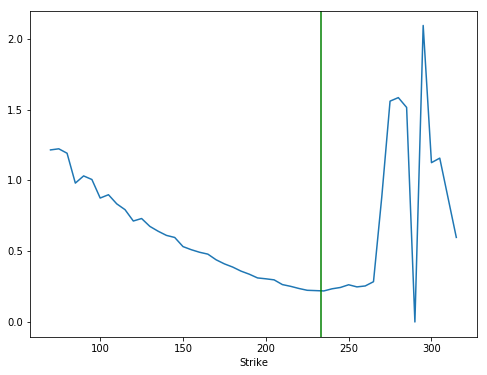

In [7]:
# para los put de la fecha 1
ax = put06_f1.set_index('Strike').loc[:, 'IV'].plot(figsize=(8,6))
ax.axvline(put06_f1.Underlying_Price.iloc[0], color='g');

In [9]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

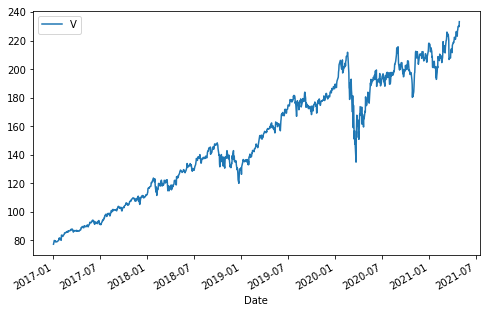

In [10]:
ticker = ['V']
start_date = '2017-01-01'

closes_aapl = get_adj_closes(ticker, start_date)
closes_aapl.plot(figsize=(8,5));
plt.legend(ticker);

In [12]:
def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

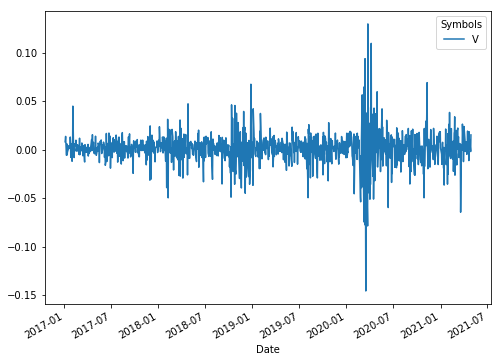

In [13]:
ret_aapl = calc_daily_ret(closes_aapl)
ret_aapl.plot(figsize=(8,6));

In [14]:
aapl = web.YahooOptions('V')
aapl_opt = aapl.get_all_data().reset_index()
aapl_opt.set_index('Expiry').sort_index()

,Strike,Type,Symbol,...,Quote_Time,Last_Trade_Date,JSON
Expiry,,,,,,,
2021-04-30,197.5,call,V210430C00197500,...,2021-04-28 23:59:32,2021-04-09 14:06:40,"{'contractSymbol': 'V210430C00197500', 'strike..."
2021-04-30,220.0,put,V210430P00220000,...,2021-04-28 23:59:32,2021-04-28 19:54:48,"{'contractSymbol': 'V210430P00220000', 'strike..."
2021-04-30,220.0,call,V210430C00220000,...,2021-04-28 23:59:32,2021-04-28 18:40:33,"{'contractSymbol': 'V210430C00220000', 'strike..."
2021-04-30,170.0,call,V210430C00170000,...,2021-04-28 23:59:32,2021-04-26 14:44:58,"{'contractSymbol': 'V210430C00170000', 'strike..."
2021-04-30,247.5,call,V210430C00247500,...,2021-04-28 23:59:32,2021-04-28 18:59:20,"{'contractSymbol': 'V210430C00247500', 'strike..."
...,...,...,...,...,...,...,...
2023-01-20,130.0,call,V230120C00130000,...,2021-04-28 23:59:32,2021-03-05 16:06:47,"{'contractSymbol': 'V230120C00130000', 'strike..."
2023-01-20,235.0,call,V230120C00235000,...,2021-04-28 23:59:32,2021-04-28 17:56:08,"{'contractSymbol': 'V230120C00235000', 'strike..."
2023-01-20,235.0,put,V230120P00235000,...,2021-04-28 23:59:32,2021-03-10 19:43:45,"{'contractSymbol': 'V230120P00235000', 'strike..."


In [15]:
aapl_opt.Underlying_Price[0]


233.51

In [19]:
K = 235 # strike price
indice_opt = aapl_opt.loc[(aapl_opt.Type=='put') & (aapl_opt.Strike==K) & (aapl_opt.Expiry=='2023-01-20')]
indice_opt

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
746,235.0,2023-01-20,put,...,2021-04-28 23:59:32,2021-03-10 19:43:45,"{'contractSymbol': 'V230120P00235000', 'strike..."


In [20]:
i_opt= indice_opt.index
opcion_valuar = aapl_opt.loc[i_opt[0]]
opcion_valuar['JSON']

{'contractSymbol': 'V230120P00235000',
 'strike': 235.0,
 'currency': 'USD',
 'lastPrice': 38.9,
 'change': 0.0,
 'percentChange': 0.0,
 'volume': 6,
 'openInterest': 7,
 'bid': 37.2,
 'ask': 38.85,
 'contractSize': 'REGULAR',
 'expiration': 1674172800,
 'lastTradeDate': 1615405425,
 'impliedVolatility': 0.3119880813598632,
 'inTheMoney': True}

In [21]:
print('Precio del activo subyacente actual = ',opcion_valuar.Underlying_Price)

Precio del activo subyacente actual =  233.51


In [22]:
# Obtenemos el rendimiento simple
Ri = closes_aapl.pct_change(1).iloc[1:]
# Obtenemos su media y desviación estándar de los rendimientos
mu_R = Ri.mean()[0]
sigma_R = Ri.std()[0]
Ri

Symbols,V
Date,
2017-01-04,8.176e-03
2017-01-05,1.173e-02
2017-01-06,1.381e-02
2017-01-09,-5.595e-03
2017-01-10,-5.382e-03
...,...
2021-04-22,5.276e-04
2021-04-23,1.068e-02
2021-04-26,1.478e-03


In [26]:
from datetime import date

# Encontrar la fecha de hoy en fomato timestamp
today = pd.to_datetime(date.today())

# Obtener fecha de cierre de la opción a valuar
expiry = opcion_valuar.Expiry

nscen = 10

# Generar rangos de fechas de días hábiles
dates = pd.date_range(today, expiry, freq='B')
ndays = len(dates)

In [27]:
today = pd.to_datetime(date.today())

# Obtener fecha de cierre de la opción a valuar
expiry = opcion_valuar.Expiry

len(pd.date_range(today, expiry, freq='B'))

453

In [28]:
dt = 1; # Rendimiento diario 
Z = np.random.randn(ndays,nscen)  # Z ~ N(0,1)
# Simulación normal de los rendimientos
Ri_dt = pd.DataFrame(mu_R*dt+Z*sigma_R*np.sqrt(dt),index=dates)
Ri_dt.cumprod()

,0,1,2,...,7,8,9
2021-04-28,-1.152e-02,-9.649e-03,1.334e-02,...,9.096e-03,9.857e-03,-1.673e-02
2021-04-29,-1.170e-04,-1.504e-04,-4.819e-05,...,-5.444e-05,-7.885e-05,-9.626e-05
2021-04-30,-2.963e-06,-1.989e-06,5.966e-08,...,-4.179e-07,1.099e-07,-1.664e-06
2021-05-03,6.122e-08,1.578e-08,9.095e-10,...,4.393e-09,1.055e-09,4.542e-10
2021-05-04,7.297e-10,1.579e-10,1.120e-11,...,1.412e-11,-9.921e-12,1.389e-11
...,...,...,...,...,...,...,...
2023-01-16,-0.000e+00,-0.000e+00,-0.000e+00,...,0.000e+00,-0.000e+00,0.000e+00
2023-01-17,-0.000e+00,0.000e+00,-0.000e+00,...,0.000e+00,-0.000e+00,-0.000e+00
2023-01-18,0.000e+00,-0.000e+00,-0.000e+00,...,-0.000e+00,-0.000e+00,-0.000e+00
2023-01-19,0.000e+00,-0.000e+00,0.000e+00,...,-0.000e+00,-0.000e+00,-0.000e+00


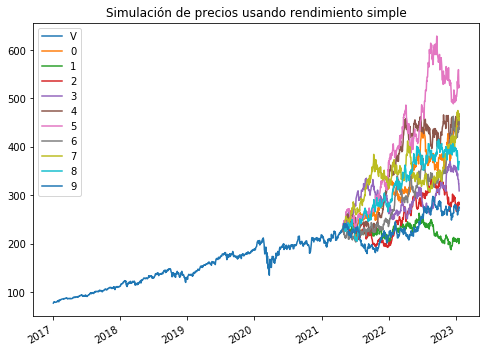

In [29]:
# Simulación del precio
S_0 = closes_aapl.iloc[-1,0]
S_T = S_0*(1+Ri_dt).cumprod()

# Se muestran los precios simulados con los precios descargados
pd.concat([closes_aapl,S_T]).plot(figsize=(8,6));
plt.title('Simulación de precios usando rendimiento simple');

In [30]:
ri = calc_daily_ret(closes_aapl)
# Usando la media y desviación estándar de los rendimientos logarítmicos
mu_r = ri.mean()[0]
sigma_r = ri.std()[0]

# # Usando la equivalencia teórica
# mu_r2 = mu_R - (sigma_R**2)/2

sim_ret_ri = pd.DataFrame(mu_r*dt+Z*sigma_r*np.sqrt(dt), index=dates)

# Simulación del precio
S_0 = closes_aapl.iloc[-1,0]
S_T2 = S_0*np.exp(sim_ret_ri.cumsum())

# Se muestran los precios simulados con los precios descargados
# pd.concat([closes_aapl,S_T2]).plot(figsize=(8,6));
# plt.title('Simulación de precios usando rendimiento logarítmico');

# from sklearn.metrics import mean_absolute_error
e1 = np.abs(S_T-S_T2).mean().mean()
e1

0.7614644727818716

In [31]:
print('Las std usando rendimientos logarítmicos y simples son similares')
sigma_R,sigma_r

Las std usando rendimientos logarítmicos y simples son similares


(0.01704564955978968, 0.01704280822133006)

In [32]:
opcion_valuar['JSON']

{'contractSymbol': 'V230120P00235000',
 'strike': 235.0,
 'currency': 'USD',
 'lastPrice': 38.9,
 'change': 0.0,
 'percentChange': 0.0,
 'volume': 6,
 'openInterest': 7,
 'bid': 37.2,
 'ask': 38.85,
 'contractSize': 'REGULAR',
 'expiration': 1674172800,
 'lastTradeDate': 1615405425,
 'impliedVolatility': 0.3119880813598632,
 'inTheMoney': True}

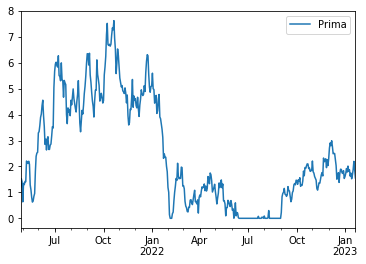

In [33]:
strike = pd.DataFrame(opcion_valuar['JSON']['strike']*np.ones([ndays,nscen]), index=dates)
put = pd.DataFrame({'Prima':np.exp(-mu_r*ndays) \
              *np.fmax(strike-S_T2,np.zeros([ndays,nscen])).mean(axis=1)}, index=dates)
put.plot();

In [34]:
mu = ret_aapl.mean()[0]
sigma = ret_aapl.std()[0]
mu, sigma

(0.0010174859134225542, 0.01704280822133006)

In [35]:
# Tasa de bonos de 1 yr de fecha 21/04/2021 -> 7%
r = 0.007/360 # Tasa diaria

In [39]:
from datetime import date

today = pd.Timestamp(date.today())
expiry = opcion_valuar.Expiry

dates = pd.date_range(start=today, end=expiry, freq='B')

ndays = len(dates)
nscen = 10
dates

DatetimeIndex(['2021-04-28', '2021-04-29', '2021-04-30', '2021-05-03',
               '2021-05-04', '2021-05-05', '2021-05-06', '2021-05-07',
               '2021-05-10', '2021-05-11',
               ...
               '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
               '2023-01-13', '2023-01-16', '2023-01-17', '2023-01-18',
               '2023-01-19', '2023-01-20'],
              dtype='datetime64[ns]', length=453, freq='B')

In [40]:
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r, index=dates)
sim_ret.cumsum()
# Las columnas son los escenarios y las filas son las días de contrato

,0,1,2,...,7,8,9
2021-04-28,0.016,1.519e-02,0.018,...,0.022,-0.031,-0.023
2021-04-29,0.044,8.437e-03,0.014,...,-0.009,-0.041,-0.025
2021-04-30,0.033,-5.396e-04,-0.026,...,-0.008,-0.027,-0.040
2021-05-03,0.065,-1.122e-03,-0.021,...,-0.006,-0.035,-0.031
2021-05-04,0.059,3.381e-03,-0.010,...,0.007,-0.010,-0.011
...,...,...,...,...,...,...,...
2023-01-16,0.306,5.584e-01,-0.288,...,0.033,-0.114,0.074
2023-01-17,0.303,5.570e-01,-0.297,...,0.056,-0.109,0.062
2023-01-18,0.331,5.665e-01,-0.287,...,0.060,-0.082,0.083
2023-01-19,0.333,5.881e-01,-0.262,...,0.110,-0.094,0.094


In [41]:
S0 = closes_aapl.iloc[-1,0]  # Condición inicial del precio a simular
sim_closes = S0*np.exp(sim_ret.cumsum())
sim_closes

,0,1,2,...,7,8,9
2021-04-28,237.318,237.022,237.766,...,238.578,226.363,228.253
2021-04-29,243.972,235.428,236.734,...,231.292,224.167,227.794
2021-04-30,241.374,233.324,227.497,...,231.550,227.199,224.297
2021-05-03,249.212,233.188,228.556,...,231.960,225.468,226.243
2021-05-04,247.596,234.241,231.193,...,235.038,231.205,230.992
...,...,...,...,...,...,...,...
2023-01-16,316.949,408.058,175.107,...,241.387,208.282,251.391
2023-01-17,316.117,407.479,173.438,...,246.845,209.433,248.299
2023-01-18,325.156,411.364,175.291,...,247.996,215.002,253.645
2023-01-19,325.714,420.331,179.695,...,260.513,212.419,256.455


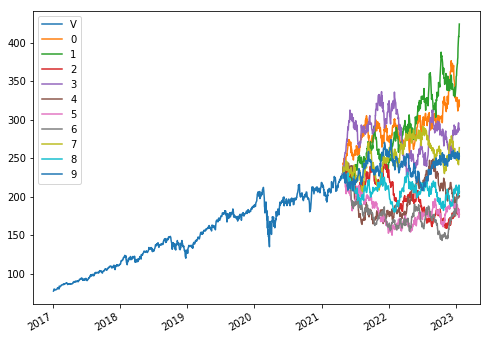

In [42]:
# Se muestran los precios simulados con los precios descargados
pd.concat([closes_aapl,sim_closes]).plot(figsize=(8,6));


In [43]:
opcion_valuar['JSON']

{'contractSymbol': 'V230120P00235000',
 'strike': 235.0,
 'currency': 'USD',
 'lastPrice': 38.9,
 'change': 0.0,
 'percentChange': 0.0,
 'volume': 6,
 'openInterest': 7,
 'bid': 37.2,
 'ask': 38.85,
 'contractSize': 'REGULAR',
 'expiration': 1674172800,
 'lastTradeDate': 1615405425,
 'impliedVolatility': 0.3119880813598632,
 'inTheMoney': True}

In [44]:
from datetime import date
Hoy = date.today()
K = opcion_valuar['JSON']['strike']  # strike price
ndays = (opcion_valuar.Expiry - today).days
nscen = 100000
dates = pd.date_range(start= Hoy, periods = ndays)
S0 = closes_aapl.iloc[-1,0]  # Condición inicial del precio a simular

sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
sim_closes = S0*np.exp(sim_ret.cumsum())
#strike = pd.DataFrame({'Strike':K*np.ones(ndays)}, index=dates)
#simul = pd.concat([closes_aapl.T,strike.T,sim_closes.T]).T
#simul.plot(figsize=(8,6),legend=False);

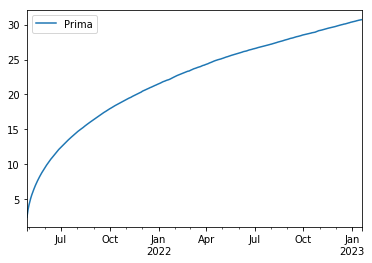

In [45]:
strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)
put = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(strike-sim_closes,np.zeros([ndays,nscen])).mean(axis=1)}, index=dates)
put.plot();

In [46]:
put.iloc[-1]

Prima    30.701
Name: 2023-01-19 00:00:00, dtype: float64

In [47]:
confianza = 0.99
sigma_est = sim_closes.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i2)


(29.757212867060304, 31.644192627667096)


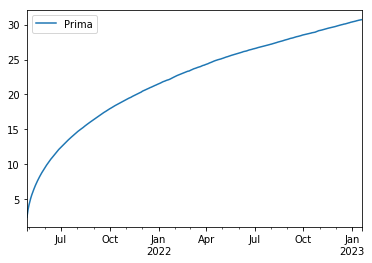

In [48]:
# Usando muestreo estratificado----> #estratros = nscen
U = (np.arange(0,nscen)+np.random.rand(ndays,nscen))/nscen
Z = st.norm.ppf(U)

sim_ret2 = pd.DataFrame(sigma*Z+r,index=dates)
sim_closes2 = S0*np.exp(sim_ret.cumsum())

# Función de pago
strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)
put = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(strike-sim_closes2,np.zeros([ndays,nscen])).T.mean()}, index=dates)
put.plot();

In [49]:
put.iloc[-1]

Prima    30.701
Name: 2023-01-19 00:00:00, dtype: float64

In [50]:
confianza = 0.99
sigma_est = sim_closes2.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i2)

(29.757212867060304, 31.644192627667096)


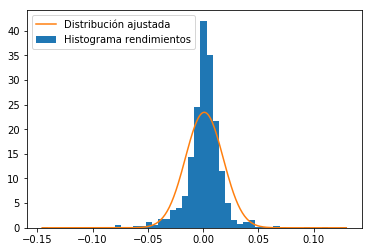

In [52]:
#Ajustando Norm
ren = calc_daily_ret(closes_aapl) # rendimientos 
y,x,des = plt.hist(ren['V'],bins=50,density=True,label='Histograma rendimientos')

mu_fit,sd_fit = st.norm.fit(ren) # Se ajustan los parámetros de una normal
# Valores máximo y mínimo de los rendiemientos a generar
ren_max = max(x);ren_min = min(x)
# Vector de rendimientos generados
ren_gen = np.arange(ren_min,ren_max,0.001)
# Generación de la normal ajustado con los parámetros encontrados
curve_fit = st.norm.pdf(ren_gen,loc=mu_fit,scale=sd_fit)
plt.plot(ren_gen,curve_fit,label='Distribución ajustada')
plt.legend()
plt.show()


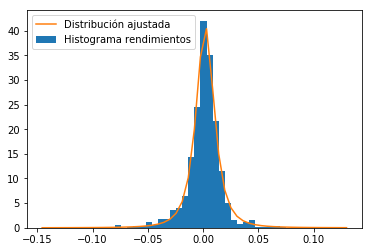

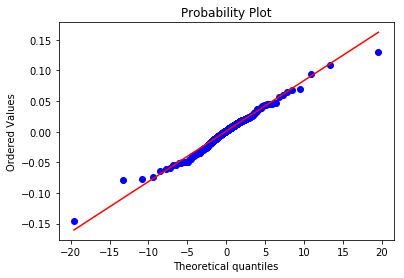

In [54]:
# rendimientos 
ren = calc_daily_ret(closes_aapl) 

# Histograma de los rendimientos
y, x, _ = plt.hist(ren['V'], bins=50, density=True, label='Histograma rendimientos')

# Se ajustan los parámetros de una distribución
dist = 't'
params = getattr(st, dist).fit(ren.values) 

# Generación de la pdf de la distribución ajustado con los parámetros encontrados
curve_fit = getattr(st, dist).pdf(x, *params)
plt.plot(x, curve_fit, label='Distribución ajustada')
plt.legend()
plt.show()

# Q-Q
st.probplot(ren['V'], sparams=params[:-2], dist=dist, plot=plt);



In [55]:
ndays = len(dates) 
nscen = 10
prob = y/np.sum(y)
values = x[1:]
prob.sum()

1.0

In [56]:
# Rendimientos simulados
ret = np.random.choice(values, ndays*nscen, p=prob)
# Fechas
dates = pd.date_range(start=Hoy,periods=ndays)
# Rendimien en Data Frame
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_ret_hist

,0,1,2,...,7,8,9
2021-04-28,0.047,-0.002,-0.008,...,0.025,0.009,0.003
2021-04-29,-0.008,0.009,0.003,...,0.009,-0.030,0.014
2021-04-30,0.003,0.009,-0.002,...,0.003,0.014,0.009
2021-05-01,0.003,-0.002,-0.002,...,0.009,0.009,0.014
2021-05-02,0.009,0.009,0.003,...,-0.013,-0.008,0.003
...,...,...,...,...,...,...,...
2023-01-15,-0.002,0.003,0.009,...,-0.008,-0.013,-0.002
2023-01-16,-0.063,-0.030,-0.008,...,0.014,-0.002,0.036
2023-01-17,0.014,0.003,0.009,...,0.003,0.003,-0.002
2023-01-18,0.025,0.009,-0.008,...,-0.024,-0.002,0.003


In [57]:
sim_closes_hist = (closes_aapl.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())
sim_closes_hist

,0,1,2,...,7,8,9
2021-04-28,244.704,232.877,231.599,...,239.375,235.455,234.162
2021-04-29,242.763,234.877,232.305,...,241.431,228.501,237.477
2021-04-30,243.504,236.894,231.735,...,242.167,231.735,239.516
2021-05-01,244.247,236.312,231.166,...,244.247,233.725,242.906
2021-05-02,246.345,238.342,231.871,...,240.980,231.871,243.647
...,...,...,...,...,...,...,...
2023-01-15,1530.228,2212.692,2929.796,...,2962.228,1136.758,1311.661
2023-01-16,1436.789,2147.341,2906.561,...,3004.156,1133.968,1359.840
2023-01-17,1457.126,2153.892,2931.521,...,3013.323,1137.428,1356.502
2023-01-18,1494.109,2172.389,2908.273,...,2940.466,1134.636,1360.641


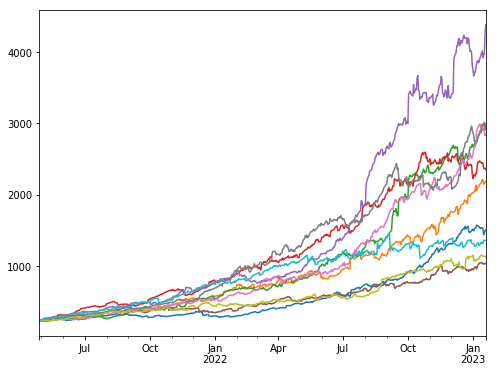

In [58]:
sim_closes_hist.plot(figsize=(8,6),legend=False);

Text(0.5, 1.0, 'Simulación usando el histograma de los rendimientos')

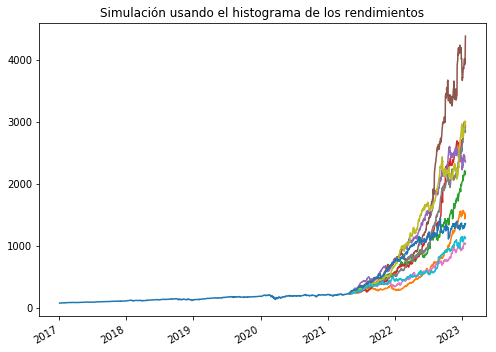

In [59]:
pd.concat([closes_aapl,sim_closes_hist]).plot(figsize=(8,6),legend=False);
plt.title('Simulación usando el histograma de los rendimientos')

In [60]:
K = opcion_valuar['JSON']['strike']
ndays = len(dates)
nscen = 100000

# Histograma tomando la tasa libre de riesgo
freq, values = np.histogram(ret_aapl+r-mu, bins=2000)
prob = freq/np.sum(freq)

# Simulación de los rendimientos
ret = np.random.choice(values[1:], ndays*nscen, p=prob)

# Simulación de precios
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_closes_hist = (closes_aapl.iloc[-1,0]) * np.exp(sim_ret_hist.cumsum())

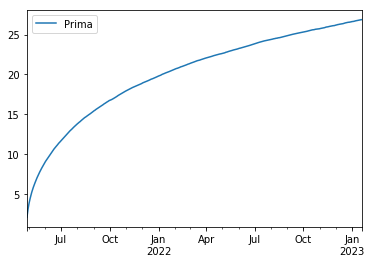

In [61]:
strike = pd.DataFrame(K*np.ones(ndays*nscen).reshape((ndays,nscen)), index=dates)
put_hist = pd.DataFrame({'Prima':np.exp(-r*ndays)*np.fmax(strike-sim_closes_hist,np.zeros(ndays*nscen).reshape((ndays,nscen))).T.mean()}, index=dates)
put_hist.plot();

In [62]:
Prima=put_hist.iloc[-1]
Prima

Prima    26.865
Name: 2023-01-19 00:00:00, dtype: float64

In [63]:
opcion_valuar['JSON']

{'contractSymbol': 'V230120P00235000',
 'strike': 235.0,
 'currency': 'USD',
 'lastPrice': 38.9,
 'change': 0.0,
 'percentChange': 0.0,
 'volume': 6,
 'openInterest': 7,
 'bid': 37.2,
 'ask': 38.85,
 'contractSize': 'REGULAR',
 'expiration': 1674172800,
 'lastTradeDate': 1615405425,
 'impliedVolatility': 0.3119880813598632,
 'inTheMoney': True}

In [64]:
confianza = 0.95
sigma_est = sim_closes_hist.iloc[-1].sem()
mean_est = put_hist.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
print(i1)


(26.11045780772365, 27.619710437653698)


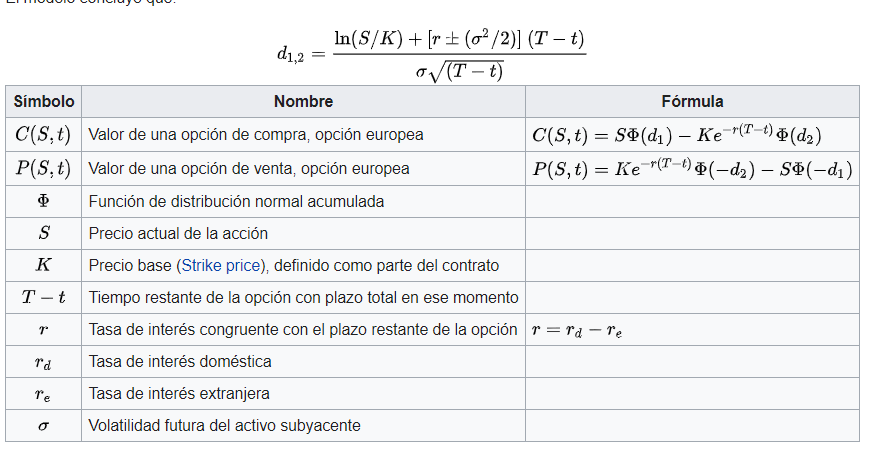

In [65]:

D1 = (np.log(S0/K) + (r +(sigma**2/2)))/(sigma*(np.sqrt(ndays)))

D2 = D1 - (sigma*np.sqrt(ndays))


In [66]:

P_S = (K * np.exp(-r*ndays)* st.norm.cdf(-D2))- S0*st.norm.cdf(-D1)

In [67]:
print("Valor B&S",P_S)

Valor B&S 37.701507387345416


In [68]:
print("Valor Aproximación",Prima)

Valor Aproximación Prima    26.865
Name: 2023-01-19 00:00:00, dtype: float64


Vemos que nuestra aproximación esta un poco lejos del valor de la ecuación *B&S*. Pero de aquí podemos partir para tomar algunas decisiones. 


## Respuesta Cristina Vazquez -  Valuación de Put-Walmart

In [4]:
ticker = ['WMT']
start_date = '2017-01-01'

closes_wmt = get_adj_closes(ticker, start_date)
ret_wmt = calc_daily_ret(closes_wmt)

In [5]:
wmt = web.YahooOptions('WMT')
wmt_opt = wmt.get_all_data().reset_index()
#wmt_opt.set_index('Expiry').sort_index()

In [6]:
K = 135 # strike price
indice_opt = wmt_opt.loc[(wmt_opt.Type=='put') & (wmt_opt.Strike==K) & (wmt_opt.Expiry=='2023-01-20')]
indice_opt

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
343,135.0,2023-01-20,put,...,2021-04-28 23:59:02,2021-04-26 18:19:35,"{'contractSymbol': 'WMT230120P00135000', 'stri..."


In [7]:
i_opt= indice_opt.index
opcion_valuar = wmt_opt.loc[i_opt[0]]

print('Precio del activo subyacente actual = ',opcion_valuar.Underlying_Price)

Precio del activo subyacente actual =  137.88


# Simulación de precios usando rendimiento simple y logarítmico 

In [9]:
# Obtenemos el rendimiento simple
Ri = closes_wmt.pct_change(1).iloc[1:]
# Obtenemos su media y desviación estándar de los rendimientos
mu_R = Ri.mean()[0]
sigma_R = Ri.std()[0]
Ri.head()

Symbols,WMT
Date,
2017-01-04,0.006
2017-01-05,0.002
2017-01-06,-0.014
2017-01-09,0.007
2017-01-10,-0.007


In [10]:
from datetime import date

# Encontrar la fecha de hoy en fomato timestamp
today = pd.to_datetime(date.today())

# Obtener fecha de cierre de la opción a valuar
expiry = opcion_valuar.Expiry

nscen = 10000

# Generar rangos de fechas de días hábiles
dates = pd.date_range(today, expiry, freq='B')
ndays = len(dates)

## Mostrar como simular precios usando los rendimientos

### 1. Usando rendimiento simple

In [11]:
# Rendimiento diario 
dt = 1 #POR UN DIA
# Z ~ N(0,1) normal estándar (ndays, nscen)
Z = np.random.rand(ndays, nscen)

# Simulación normal de los rendimientos
Ri_dt = pd.DataFrame(Z * sigma_R * np.sqrt(dt) + mu_R*dt, index=dates) 
Ri_dt.head()

,0,1,2,...,9997,9998,9999
2021-04-28,0.004,0.008,0.009,...,0.002,0.005,0.003
2021-04-29,0.015,0.005,0.009,...,0.003,0.003,0.014
2021-04-30,0.012,0.013,0.001,...,0.002,0.008,0.004
2021-05-03,0.010,0.013,0.005,...,0.001,0.006,0.011
2021-05-04,0.011,0.007,0.013,...,0.004,0.009,0.008


In [12]:
S_0 = opcion_valuar.Underlying_Price
S_T = (Ri_dt+1).cumprod() * S_0

# Simulación del precio
S_0 = closes_wmt.iloc[-1,0]
S_T = S_0*(1+Ri_dt).cumprod()

In [14]:
S0 = closes_wmt.iloc[-1,0] 

ri = calc_daily_ret(closes_wmt)

men_ri = ri.mean()[0]

sigma_ri = ri.std()[0]
Z = np.random.randn(ndays, nscen)

ri_dt = pd.DataFrame(Z * sigma_R * np.sqrt(dt) + mu_R*dt, index=dates)

S_T = S_0*np.exp(ri_dt.cumsum())
S_T.iloc[0,:]=S0
S_T.head()

,0,1,2,...,9997,9998,9999
2021-04-28,137.890,137.890,137.890,...,137.890,137.890,137.890
2021-04-29,134.957,136.972,141.819,...,135.090,137.493,141.910
2021-04-30,134.803,135.665,141.844,...,133.552,138.009,142.919
2021-05-03,131.969,133.933,141.398,...,135.818,136.511,139.223
2021-05-04,133.111,136.451,142.508,...,137.066,138.840,140.863


### 2.Rendimiento Logarítmico

In [15]:
# Calcular rendimiento logarítmico
ri = calc_daily_ret(closes_wmt)


# Usando la media y desviación estándar de los rendimientos logarítmicos
mu_r = ri.mean()[0]
sigma_r = ri.std()[0]

# Simulación del rendimiento
Z = np.random.randn(ndays, nscen)
sim_ret_ri = pd.DataFrame(mu_r * dt + Z * sigma_r * np.sqrt(dt), index=dates )

# Simulación del precio
S_0 = closes_wmt.iloc[-1,0]
S_T2 = S_0*np.exp(sim_ret_ri.cumsum())

# Se muestran los precios simulados con los precios descargados
# pd.concat([closes_aapl,S_T2]).plot(figsize=(8,6));
# plt.title('Simulación de precios usando rendimiento logarítmico');

# from sklearn.metrics import mean_absolute_error
e1 = np.abs(S_T-S_T2).mean().mean()
e1

40.742857153298516

In [16]:
print('Las std usando rendimientos logarítmicos y simples son similares')
sigma_R,sigma_r

Las std usando rendimientos logarítmicos y simples son similares


(0.014324841750983216, 0.014238074652458443)

In [17]:
mu = ret_wmt.mean()[0]
sigma = ret_wmt.std()[0]
mu, sigma

(0.0007247165253673291, 0.014238074652458443)

In [18]:
r = 0.0006/360 # Tasa diaria

from datetime import date

today = pd.Timestamp(date.today())
expiry = opcion_valuar.Expiry

ndays = (expiry - today).days
nscen = 10
dates = pd.date_range(start=today, periods = ndays)

In [19]:
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r, index=dates)
sim_ret.cumsum()

,0,1,2,...,7,8,9
2021-04-28,-0.006,-0.026,-0.003,...,-6.211e-04,0.033,7.338e-04
2021-04-29,0.006,-0.027,0.017,...,1.436e-03,0.030,-4.150e-03
2021-04-30,0.005,-0.012,0.010,...,-1.376e-02,0.009,-5.921e-03
2021-05-01,-0.002,-0.021,0.021,...,-8.604e-03,0.005,-2.740e-02
2021-05-02,0.004,-0.033,0.029,...,-2.337e-02,0.009,-1.541e-02
...,...,...,...,...,...,...,...
2023-01-15,0.306,0.799,0.918,...,-2.314e-02,-0.282,-1.380e-01
2023-01-16,0.284,0.807,0.902,...,-3.146e-02,-0.299,-1.293e-01
2023-01-17,0.256,0.772,0.903,...,-3.666e-02,-0.299,-1.504e-01
2023-01-18,0.273,0.761,0.904,...,-4.063e-02,-0.305,-1.486e-01


In [20]:
S0 = closes_wmt.iloc[-1,0]  # Condición inicial del precio a simular
sim_closes = S0*np.exp(sim_ret.cumsum())
sim_closes.iloc[0,:]=S0
sim_closes

,0,1,2,...,7,8,9
2021-04-28,137.890,137.890,137.890,...,137.890,137.890,137.890
2021-04-29,138.738,134.163,140.309,...,138.088,142.083,137.319
2021-04-30,138.586,136.179,139.232,...,136.006,139.119,137.076
2021-05-01,137.613,135.027,140.856,...,136.709,138.632,134.163
2021-05-02,138.458,133.378,142.007,...,134.704,139.085,135.782
...,...,...,...,...,...,...,...
2023-01-15,187.281,306.550,345.233,...,134.735,103.960,120.112
2023-01-16,183.246,309.045,339.688,...,133.620,102.297,121.165
2023-01-17,178.096,298.280,340.093,...,132.926,102.252,118.639
2023-01-18,181.151,295.043,340.348,...,132.400,101.668,118.849


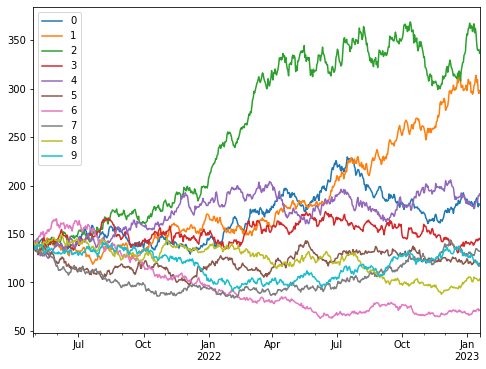

In [21]:
sim_closes.plot(figsize=(8,6));

In [22]:
from datetime import date
Hoy = date.today()

# strike price
K = opcion_valuar['JSON']['strike']  

# Fechas a simular
dates = pd.date_range(start= Hoy, periods = ndays, freq='B')

# Escenarios y número de días
ndays = len(dates)
nscen = 100000

# Condición inicial del precio a simular
S0 = closes_wmt.iloc[-1,0]  

# simular rendimientos
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)

# Simular precios
sim_closes = S0*np.exp(sim_ret.cumsum())


$$ P(S(t),t)=max\{K-S(T),0\} \rightarrow \text{En el caso de Put}$$ 


In [23]:
np.fmax(K-sim_closes,0)

,0,1,2,...,99997,99998,99999
2021-04-28,0.0,0.000,0.778,...,0.000,0.000,0.0
2021-04-29,0.0,0.441,1.940,...,0.000,0.000,0.0
2021-04-30,0.0,0.104,1.333,...,0.000,0.000,0.0
2021-05-03,0.0,0.000,2.508,...,2.896,0.000,0.0
2021-05-04,0.0,0.000,5.800,...,2.028,2.673,0.0
...,...,...,...,...,...,...,...
2023-09-22,0.0,0.000,6.029,...,49.824,0.000,0.0
2023-09-25,0.0,0.000,5.887,...,49.137,0.000,0.0
2023-09-26,0.0,0.000,7.753,...,50.977,0.000,0.0
2023-09-27,0.0,0.000,7.819,...,50.230,0.000,0.0


In [24]:
np.exp(-r*ndays)*np.fmax(K-sim_closes,0).mean(axis=1)

2021-04-28     0.059
2021-04-29     0.204
2021-04-30     0.357
2021-05-03     0.505
2021-05-04     0.645
               ...  
2023-09-22    14.474
2023-09-25    14.481
2023-09-26    14.487
2023-09-27    14.491
2023-09-28    14.499
Freq: B, Length: 632, dtype: float64

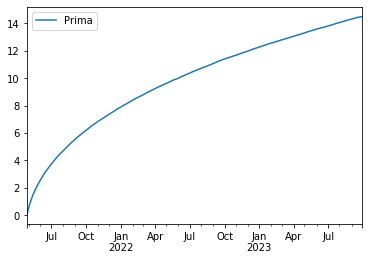

In [25]:
strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)

# Valor del call europeo
put = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(strike-sim_closes,np.zeros([ndays,nscen])).mean(axis=1)}, index=dates)
put.plot();


In [26]:
a = put.iloc[-1]

In [27]:
confianza = 0.99
sigma_est = sim_closes.iloc[-1].sem()
mean_est = a.Prima
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i2)

(14.057220145843315, 14.939901138698806)


## Precios simulados usando técnicas de reducción de varianza


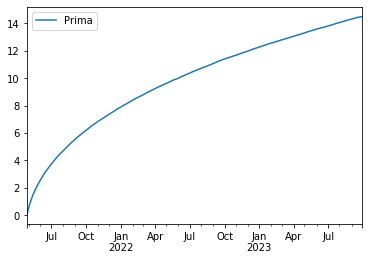

In [28]:
# Usando muestreo estratificado----> #estratros = nscen
U = (np.arange(0,nscen)+np.random.rand(ndays,nscen))/nscen
Z = st.norm.ppf(U)

sim_ret2 = pd.DataFrame(sigma*Z+r,index=dates)
sim_closes2 = S0*np.exp(sim_ret.cumsum())

# Función de pago
strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)
put = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(strike-sim_closes2,np.zeros([ndays,nscen])).T.mean()}, index=dates)
put.plot();

In [29]:
put.iloc[-1]
confianza = 0.99
sigma_est = sim_closes2.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i2)
print(put.iloc[-1])

(14.057220145843315, 14.939901138698806)
Prima    14.499
Name: 2023-09-28 00:00:00, dtype: float64


### Análisis de la distribución de los rendimientos

### Ajustando norm

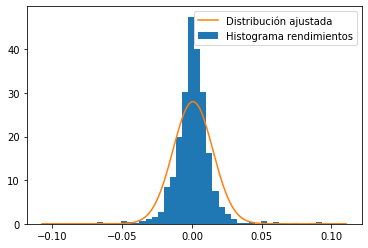

In [30]:
ren = calc_daily_ret(closes_wmt) # rendimientos 
y,x,des = plt.hist(ren['WMT'],bins=50,density=True,label='Histograma rendimientos')

mu_fit,sd_fit = st.norm.fit(ren) # Se ajustan los parámetros de una normal
# Valores máximo y mínimo de los rendiemientos a generar
ren_max = max(x);ren_min = min(x)
# Vector de rendimientos generados
ren_gen = np.arange(ren_min,ren_max,0.001)
# Generación de la normal ajustado con los parámetros encontrados
curve_fit = st.norm.pdf(ren_gen,loc=mu_fit,scale=sd_fit)
plt.plot(ren_gen,curve_fit,label='Distribución ajustada')
plt.legend()
plt.show()

### Ajustando con T

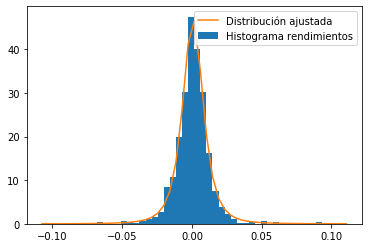

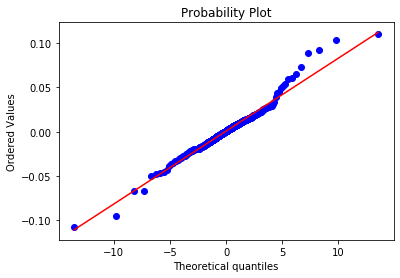

In [31]:
# rendimientos 
ren = calc_daily_ret(closes_wmt) 

# Histograma de los rendimientos
y, x, _ = plt.hist(ren['WMT'], bins=50, density=True, label='Histograma rendimientos')

# Se ajustan los parámetros de una distribución
dist = 't'
params = getattr(st, dist).fit(ren.values) 

# Generación de la pdf de la distribución ajustado con los parámetros encontrados
curve_fit = getattr(st, dist).pdf(x, *params)
plt.plot(x, curve_fit, label='Distribución ajustada')
plt.legend()
plt.show()

# Q-Q
st.probplot(ren['WMT'], sparams=params[:-2], dist=dist, plot=plt);


## 3. Valuación usando simulación: uso del histograma de rendimientos

In [32]:
ndays = len(dates) 
nscen = 10
prob = y/np.sum(y)
values = x[1:]
prob.sum()

1.0

In [34]:
#Rendimiento simulados
ret = np.random.choice(values, ndays*nscen, p=prob)
#Fechas
dates = pd.date_range(start=Hoy,periods=ndays)
#Rendimientos en Data Frame
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_ret_hist.head()

,0,1,2,...,7,8,9
2021-04-28,0.006,-0.011,0.002,...,0.002,-0.003,0.006
2021-04-29,0.010,0.023,-0.011,...,0.010,-0.016,-0.003
2021-04-30,0.002,-0.003,-0.003,...,0.010,0.002,0.010
2021-05-01,0.002,0.002,0.002,...,0.002,0.002,-0.007
2021-05-02,0.023,-0.003,0.006,...,0.006,0.006,0.002


In [35]:
sim_closes_hist = (closes_wmt.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())
sim_closes_hist.head()

,0,1,2,...,7,8,9
2021-04-28,138.723,136.324,138.119,...,138.119,137.518,138.723
2021-04-29,140.172,139.561,136.550,...,139.561,135.364,138.349
2021-04-30,140.405,139.185,136.182,...,141.019,135.589,139.794
2021-05-01,140.638,139.417,136.409,...,141.253,135.815,138.810
2021-05-02,143.979,139.041,137.233,...,142.107,136.636,139.041


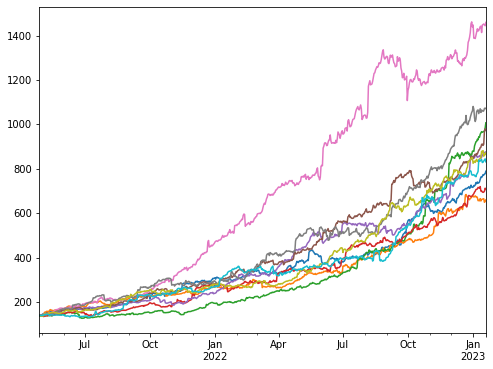

In [36]:
sim_closes_hist.plot(figsize=(8,6),legend=False);

Text(0.5, 1.0, 'Simulación usando el histograma de los rendimientos')

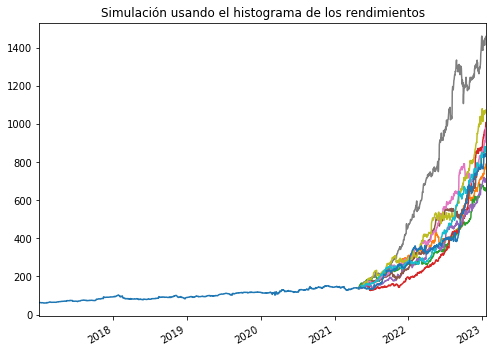

In [37]:
pd.concat([closes_wmt,sim_closes_hist]).plot(figsize=(8,6),legend=False);
plt.title('Simulación usando el histograma de los rendimientos')

In [38]:
K = opcion_valuar['JSON']['strike']
ndays = len(dates)
nscen = 10000

# Histograma tomando la tasa libre de riesgo
freq, values = np.histogram(ret_wmt+r-mu, bins=2000)
prob = freq/np.sum(freq)

# Simulación de los rendimientos
ret = np.random.choice(values[1:], ndays*nscen, p=prob)

# Simulación de precios
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_closes_hist = (closes_wmt.iloc[-1,0]) * np.exp(sim_ret_hist.cumsum())

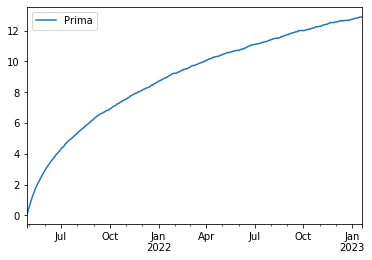

In [39]:
strike = pd.DataFrame(K*np.ones(ndays*nscen).reshape((ndays,nscen)), index=dates)
put_hist = pd.DataFrame({'Prima':np.exp(-r*ndays) \
                          *np.fmax(strike-sim_closes_hist,np.zeros(ndays*nscen).reshape((ndays,nscen))).T.mean()}, index=dates)
put_hist.plot();

In [40]:
b = put_hist.iloc[-1]

In [41]:
confianza = 0.95
sigma_est = sim_closes_hist.iloc[-1].sem()
mean_est = b.Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i2)


(11.784682061738659, 14.031439680882714)
(11.78481804486286, 14.031303697758513)


## Valor Teórico

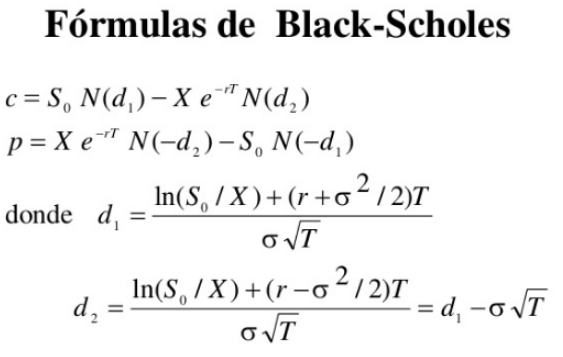

In [42]:
d1 = (np.log(S0/K) + (r + (sigma**2/2)*ndays))/(sigma*np.sqrt(ndays))
d2 = d1 - (sigma*np.sqrt(ndays))
valor_teorico = K * np.exp(-r*ndays) * st.norm.cdf(-d2) - S0*st.norm.cdf(-d1)
valor_teorico

17.891180395805613

In [43]:
valor_real = 14.97

In [44]:
df = pd.DataFrame(index=['Costo'],columns=['Real','Teórico','Simulado', 'Simulado con RV'])
df['Real'] = valor_real
df['Teórico'] = valor_teorico
df['Simulado'] = a.Prima
df['Simulado con RV'] = b.Prima
df

,Real,Teórico,Simulado,Simulado con RV
Costo,14.97,17.891,14.499,12.908


### Conclusión
Podemos observar como el costo real del put se ve simulado muy acertadamente por la simulación con rendimientos logarítmicos. Si bien las demás simulacionesno se acercan tanto al valor real, valdría la pena tomarlas en cuenta porque tal vez para el comportamiento de otro activo sean buenos indicadores.